<H2>Part 1: dimensionality reduction

<H3>data importing

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df['target'] = cancer_data.target
df['diagnosis'] = df['target'].map({0: 'M', 1: 'B'})
df = df.drop(columns=['diagnosis'])
data= df.drop(columns=['target'])
target=df['target']
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<H3>PCA (Principal Component Analysis)

In [ ]:
import numpy as np


mean = np.mean(data,axis=0)
print(mean)
data_centered = data - mean
covariance= np.cov(data_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance)
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
k = 2
principal_components = eigenvectors[:, :k]

data_pca = np.dot(data_centered, principal_components)



mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=target, cmap='plasma', edgecolors='k')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Breast Cancer Dataset')
plt.colorbar(label='Target (0=Malignant, 1=Benign)')
plt.show()

NameError: name 'data_pca' is not defined

<Figure size 800x600 with 0 Axes>

PC1 explains 44.27% of the variance.
PC2 explains 18.97% of the variance.


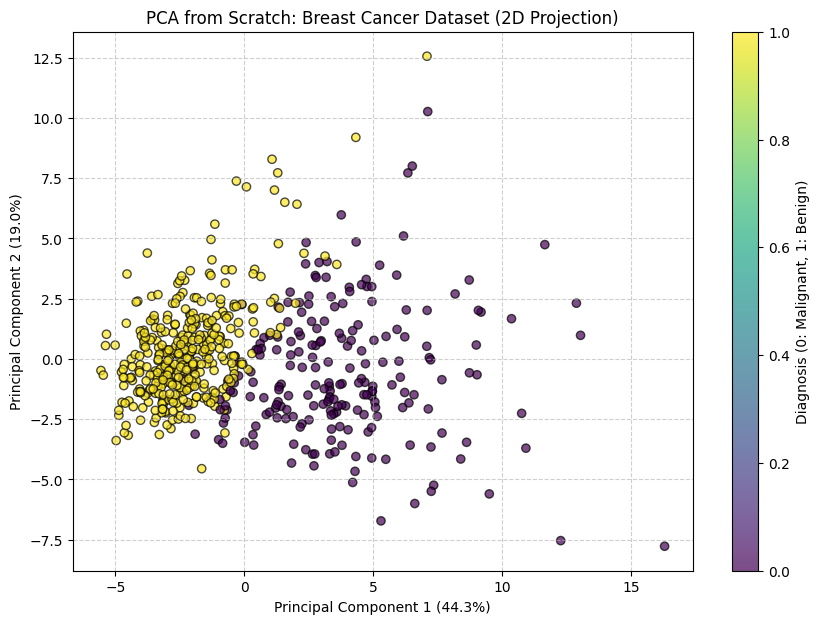

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# 1. Load the dataset
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
target = cancer_data.target

# 2. Standardize the data (Vital for PCA)
# PCA is sensitive to the scale of features. 
data_std = (df - df.mean()) / df.std()

# 3. Calculate Covariance Matrix
# rowvar=False because columns are our variables
covariance_matrix = np.cov(data_std, rowvar=False)

# 4. Calculate Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# 5. Sort components by importance (descending eigenvalues)
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# 6. Project the data onto the first 2 Principal Components
k = 3
principal_components = eigenvectors[:, :k]
data_pca = np.dot(data_std, principal_components)

# 7. Calculate Explained Variance for context
var_explained = eigenvalues / np.sum(eigenvalues)
print(f"PC1 explains {var_explained[0]:.2%} of the variance.")
print(f"PC2 explains {var_explained[1]:.2%} of the variance.")

# 8. Visualization
plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=target, cmap='viridis', edgecolors='k', alpha=0.7)
plt.xlabel(f'Principal Component 1 ({var_explained[0]:.1%})')
plt.ylabel(f'Principal Component 2 ({var_explained[1]:.1%})')
plt.title('PCA from Scratch: Breast Cancer Dataset (2D Projection)')
plt.colorbar(label='Diagnosis (0: Malignant, 1: Benign)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
plt.